In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
train=pd.read_csv("C:\\Users\\Krishna\\Desktop\\dataset\\Google_Stock_Price_Train.csv",parse_dates=["Date"],index_col="Date")
train.head()

,Open,High,Low,Close,Volume
Date,,,,,
2012-01-03,325.25,332.83,324.97,663.59,"7,380,500"
2012-01-04,331.27,333.87,329.08,666.45,"5,749,400"
2012-01-05,329.83,330.75,326.89,657.21,"6,590,300"
2012-01-06,328.34,328.77,323.68,648.24,"5,405,900"
2012-01-09,322.04,322.29,309.46,620.76,"11,688,800"


In [8]:
xtrain=train[["Open"]]

In [10]:
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler()
sc_xtrain=sc.fit_transform(xtrain)

In [11]:
len(sc_xtrain)

1258

In [12]:
def feature_transform(n_steps,data):
    x=[]
    y=[]
    for i in range(n_steps,len(data)):
        x.append(data[i-n_steps:i,0])
        y.append(data[i,0])
    return np.array(x),np.array(y)    

In [13]:
n_steps=12

In [14]:
x_train,y_train=feature_transform(n_steps,sc_xtrain)

In [16]:
x_train.shape,y_train.shape #rows,steps,feature

((1246, 12), (1246,))

In [17]:
x_train=x_train.reshape((x_train.shape[0],x_train.shape[1],1))

In [18]:
from keras.models import Sequential
from keras.layers import Dense,LSTM
model=Sequential()
model.add(LSTM(50,activation="relu",input_shape=(n_steps,1)))
model.add(Dense(1))
model.compile(loss="mean_squared_error",optimizer="adam")
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 50)                10400     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 10,451
Trainable params: 10,451
Non-trainable params: 0
_________________________________________________________________


In [19]:
history=model.fit(x_train,y_train,epochs=100,batch_size=30)

Epoch 1/100
42/42 [==============================] - 4s 10ms/step - loss: 0.1620
Epoch 2/100
42/42 [==============================] - 0s 10ms/step - loss: 0.0035
Epoch 3/100
42/42 [==============================] - 0s 10ms/step - loss: 0.0011
Epoch 4/100
42/42 [==============================] - 0s 10ms/step - loss: 7.5929e-04
Epoch 5/100
42/42 [==============================] - 0s 10ms/step - loss: 8.3994e-04
Epoch 6/100
42/42 [==============================] - 0s 12ms/step - loss: 6.4886e-04
Epoch 7/100
42/42 [==============================] - 0s 10ms/step - loss: 7.1718e-04
Epoch 8/100
42/42 [==============================] - 1s 12ms/step - loss: 6.9713e-04
Epoch 9/100
42/42 [==============================] - 1s 12ms/step - loss: 6.6690e-04
Epoch 10/100
42/42 [==============================] - 0s 11ms/step - loss: 8.3541e-04
Epoch 11/100
42/42 [==============================] - 0s 10ms/step - loss: 7.9941e-04
Epoch 12/100
42/42 [==============================] - 0s 9ms/step - loss: 5

42/42 [==============================] - 0s 12ms/step - loss: 2.4448e-04
Epoch 96/100
42/42 [==============================] - 0s 11ms/step - loss: 2.9125e-04
Epoch 97/100
42/42 [==============================] - 0s 11ms/step - loss: 3.1389e-04
Epoch 98/100
42/42 [==============================] - 0s 12ms/step - loss: 2.5000e-04
Epoch 99/100
42/42 [==============================] - 0s 11ms/step - loss: 4.0988e-04
Epoch 100/100
42/42 [==============================] - 0s 12ms/step - loss: 2.9665e-04


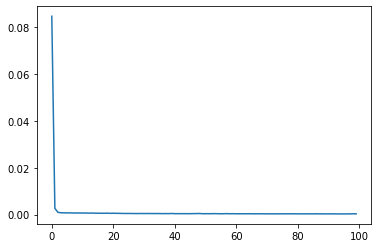

In [20]:
plt.plot(history.history["loss"])

In [21]:
test=pd.read_csv("C:\\Users\\Krishna\\Desktop\\dataset\\Google_Stock_Price_Test.csv",parse_dates=["Date"],index_col="Date")
test.head()

,Open,High,Low,Close,Volume
Date,,,,,
2017-01-03,778.81,789.63,775.80,786.14,"1,657,300"
2017-01-04,788.36,791.34,783.16,786.90,"1,073,000"
2017-01-05,786.08,794.48,785.02,794.02,"1,335,200"
2017-01-06,795.26,807.90,792.20,806.15,"1,640,200"
2017-01-09,806.40,809.97,802.83,806.65,"1,272,400"


In [22]:
xtest=test[["Open"]]
sc_xtest=sc.fit_transform(xtest)

In [23]:
x_test,y_test=feature_transform(n_steps,sc_xtest)

In [24]:
x_test=x_test.reshape((x_test.shape[0],x_test.shape[1],1))

In [25]:
ypred=model.predict(x_test)

In [26]:
prediction=sc.inverse_transform(ypred)

In [27]:
prediction

array([[805.3816 ],
       [806.0968 ],
       [806.6634 ],
       [814.5997 ],
       [820.50366],
       [824.78656],
       [827.01404],
       [817.49365]], dtype=float32)

In [28]:
y_test=sc.inverse_transform(y_test.reshape(-1,1))

In [29]:
from sklearn.metrics import mean_squared_error,r2_score 

In [34]:
mse=mean_squared_error(y_test.flatten(),prediction.flatten())
print("MSE is :",mse)
print("RMSE:",np.sqrt(mse))

MSE is : 181.26669922645286
RMSE: 13.46353219725243
